<a href="https://colab.research.google.com/github/madhuresh97/IntroToML/blob/main/MLAssignment1_Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Madhuresh Gupta

NUID: 002198926

Adding all the necessary import statements that are required for the question below

In [ ]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

# **Question 1:**

We are preparing 10,000 random samples from the given probability density function (using Gaussian Probability density) using the below code:

Text(0.5, 0, 'z')

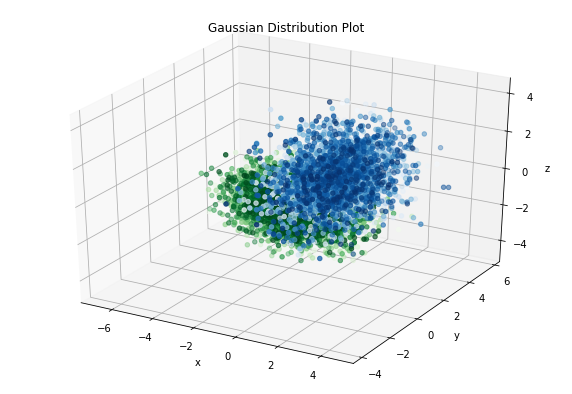

In [ ]:
#initializing the given data
numberOfSamples = 10000
rng = default_rng() #Random number generator
#Class priors
p0 = 0.7
p1 = 0.3
size0 = 0
size1 = 0

#Generating random samples from each class
for i in range(0, numberOfSamples) :
  if(random.random() < p0):
    size0 = size0 + 1
  else:
    size1 = size1 + 1

mean_0 = [-1, 1, -1, 1]
mean_1 = [1, 1, 1, 1]

cov_0  = [[2,    -0.5,  0.3,  0],
        [-0.5, 1,     -0.5, 0],
        [0.3,  -0.5,  1,    0],
        [0,    0,     0,    2]]

cov_1  = [[1,     0.3,  -0.2, 0],
        [0.3,   2,    0.3,  0],
        [-0.2,  0.3,  1,    0],
        [0,     0,    0,    3]]

samples_0 = rng.multivariate_normal(mean=mean_0, cov=cov_0, size=size0)
samples_0 = pd.DataFrame(samples_0, columns=['x','y','z','t'])
samples_0['True Class Label'] = 0
samples_1 = rng.multivariate_normal(mean=mean_1, cov=cov_1, size=size1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z','t'])
samples_1['True Class Label'] = 1
samples   = samples_0.append(samples_1)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
samples = samples.sort_values('t')
samples_0 = samples[samples['True Class Label']==0]
samples_1 = samples[samples['True Class Label']==1]
C = np.linspace(-5, 5, len(samples_0["t"]))
scamap = plt.cm.ScalarMappable(cmap='Greens')
fcolors = scamap.to_rgba(C)
ax.scatter3D(samples_0["x"],samples_0["y"],samples_0["z"],facecolors=fcolors, cmap='Greens', label='0')
C = np.linspace(-5, 5,len(samples_1["t"]))
scamap = plt.cm.ScalarMappable(cmap='Blues')
fcolors = scamap.to_rgba(C)
ax.scatter3D(samples_1["x"],samples_1["y"],samples_1["z"],facecolors=fcolors, cmap='Blues', label='1')
ax.set_title("Gaussian Distribution Plot")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


In [ ]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns

##Part A:
Minimum probability of error classification (0-1 loss, also referred to as Bayes Decision rule or MAP classifier)

1. Generate 10000 samples from this data distribution and keep track of the true labels of each
sample.

In [ ]:
# Initialize empty arrays to store discriminant scores
discriminants = []
# Fill array with calculated discriminants and add to DataFrame
for i in range(0, samples.shape[0]):
    sample = samples.iloc[i].to_numpy()[:-1]
    discriminant = multivariate_normal.pdf(sample, mean_1, cov_1)/multivariate_normal.pdf(sample, mean_0, cov_0)
    discriminants.append(discriminant)
samples['Discriminant'] = discriminants
samples = samples.sort_values('Discriminant')
dis_0 = samples[samples['True Class Label']==0]['Discriminant'].tolist()
dis_1 = samples[samples['True Class Label']==1]['Discriminant'].tolist()
df = pd.DataFrame(columns=['False Positive', 'True Positive', 'Gamma', 'Probability Error'])
for index, row in samples.iterrows():
    discriminant   = row['Discriminant'] 
    false_positive = len([class_dis for class_dis in dis_0 if class_dis>=discriminant])/len(dis_0)
    true_positive = len([class_dis for class_dis in dis_1 if class_dis>=discriminant])/len(dis_1)
    p_err = false_positive*0.7+(1-true_positive)*0.3
    d = {'False Positive': false_positive, 'True Positive': true_positive, 
          'Gamma': discriminant, 'Probability Error': p_err}
    df = df.append(d, ignore_index=True)
df = df.sort_values('Probability Error')
# Get info of minimum experimental probablility error
exp_min = df.iloc[0]
print('Experimental Mimimum Error Info:\n')
print(exp_min)
# Calculate theorectical error
thy_gamma = 0.7/0.3
thy_lambdas = [len([class_dis for class_dis in dis_0 if class_dis>=thy_gamma])/len(dis_0),
            len([class_dis for class_dis in dis_1 if class_dis>=thy_gamma])/len(dis_1)]
thy_p_err = thy_lambdas[0]*0.7 + (1-thy_lambdas[1])*0.3
thy_min = {'False Positive': thy_lambdas[0], 'True Positive': thy_lambdas[1], 'Gamma': thy_gamma, 'Probability Error': thy_p_err}
print('Theoretical Mimimum Error Info:\n')
print(thy_min)


Experimental Mimimum Error Info:

False Positive       0.054449
True Positive        0.841443
Gamma                2.390640
Probability Error    0.085681
Name: 7078, dtype: float64
Theoretical Mimimum Error Info:

{'False Positive': 0.0557386445049434, 'True Positive': 0.8437603442568686, 'Gamma': 2.3333333333333335, 'Probability Error': 0.08588894787639978}


2. Plot ROC curve by varying the threshold gamma from 0 to infinity.

(0.0, 1.0)

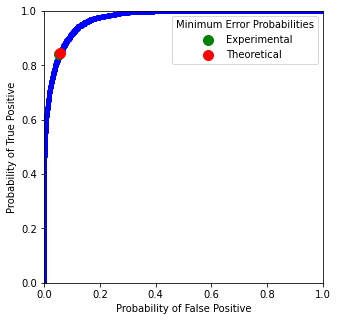

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
# Plot ROC curve
ax.plot(df['False Positive'], df['True Positive'], 'bo', markersize=4)

# Plot experimental minimum
ax.plot(exp_min['False Positive'], exp_min['True Positive'], 'go', label='Experimental', markersize=10)

# Plot theorectical minimum
ax.plot(thy_min['False Positive'], thy_min['True Positive'], 'ro', label='Theoretical', markersize=10)
ax.legend(title='Minimum Error Probabilities')
ax.set_xlabel('Probability of False Positive')
ax.set_ylabel('Probability of True Positive')
ax.set_axisbelow(True)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

3. Determine the threshold value that achieves minimum probability of error, and on the ROC curce, superimpose clearly.

#Part B:

ERM classification attempt using incorrect knowledge.
Now we need to input some incorrect covariance values and see the impacts on the model.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


Text(0.5, 0, 'z')

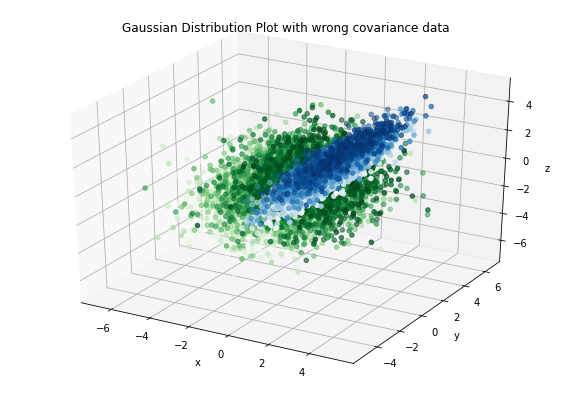

In [ ]:
wrong_cov_0  = [[2, 0, 1, 1],
                [0, 1, 2, 1],
                [1, 2, 0, 0],
                [1, 1, 0, 2]]

wrong_cov_1  = [[1,   0.5, 1,  -1],
                [0.5, 2,   1,   3],
                [1,   1,   1,   0],
                [-1,  3,   0,   3]]

samples_0 = rng.multivariate_normal(mean=mean_0, cov=wrong_cov_0, size=size0)
samples_0 = pd.DataFrame(samples_0, columns=['x','y','z','t'])
samples_0['True Class Label'] = 0
samples_1 = rng.multivariate_normal(mean=mean_1, cov=wrong_cov_1, size=size1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z','t'])
samples_1['True Class Label'] = 1
samples   = samples_0.append(samples_1)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
samples = samples.sort_values('t')
samples_0 = samples[samples['True Class Label']==0]
samples_1 = samples[samples['True Class Label']==1]
C = np.linspace(-5, 5, len(samples_0["t"]))
scamap = plt.cm.ScalarMappable(cmap='Greens')
fcolors = scamap.to_rgba(C)
ax.scatter3D(samples_0["x"],samples_0["y"],samples_0["z"],facecolors=fcolors, cmap='Greens', label='0')
C = np.linspace(-5, 5,len(samples_1["t"]))
scamap = plt.cm.ScalarMappable(cmap='Blues')
fcolors = scamap.to_rgba(C)
ax.scatter3D(samples_1["x"],samples_1["y"],samples_1["z"],facecolors=fcolors, cmap='Blues', label='1')
ax.set_title("Gaussian Distribution Plot with wrong covariance data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Calculating the ROC curve

In [ ]:
# Initialize empty arrays to store discriminant scores
discriminants = []
# Fill array with calculated discriminants and add to DataFrame
for i in range(0, samples.shape[0]):
    sample = samples.iloc[i].to_numpy()[:-1]
    discriminant = multivariate_normal.pdf(sample, mean_1, cov_1)/multivariate_normal.pdf(sample, mean_0, cov_0)
    discriminants.append(discriminant)
samples['Discriminant'] = discriminants
samples = samples.sort_values('Discriminant')
dis_0 = samples[samples['True Class Label']==0]['Discriminant'].tolist()
dis_1 = samples[samples['True Class Label']==1]['Discriminant'].tolist()
df = pd.DataFrame(columns=['False Positive', 'True Positive', 'Gamma', 'Probability Error'])
for index, row in samples.iterrows():
    discriminant   = row['Discriminant'] 
    false_positive = len([class_dis for class_dis in dis_0 if class_dis>=discriminant])/len(dis_0)
    true_positive = len([class_dis for class_dis in dis_1 if class_dis>=discriminant])/len(dis_1)
    p_err = false_positive*0.7+(1-true_positive)*0.3
    d = {'False Positive': false_positive, 'True Positive': true_positive, 
          'Gamma': discriminant, 'Probability Error': p_err}
    df = df.append(d, ignore_index=True)
df = df.sort_values('Probability Error')
# Get info of minimum experimental probablility error
exp_min = df.iloc[0]
print('Experimental Mimimum Error Info:\n')
print(exp_min)
# Calculate theorectical error
thy_gamma = 0.7/0.3
thy_lambdas = [len([class_dis for class_dis in dis_0 if class_dis>=thy_gamma])/len(dis_0),
            len([class_dis for class_dis in dis_1 if class_dis>=thy_gamma])/len(dis_1)]
thy_p_err = thy_lambdas[0]*0.7 + (1-thy_lambdas[1])*0.3
thy_min = {'False Positive': thy_lambdas[0], 'True Positive': thy_lambdas[1], 'Gamma': thy_gamma, 'Probability Error': thy_p_err}
print('Theoretical Mimimum Error Info:\n')
print(thy_min)

Experimental Mimimum Error Info:

False Positive       0.168219
True Positive        0.747766
Gamma                3.009125
Probability Error    0.193424
Name: 6567, dtype: float64
Theoretical Mimimum Error Info:

{'False Positive': 0.18125805989396762, 'True Positive': 0.7752399867593512, 'Gamma': 2.3333333333333335, 'Probability Error': 0.19430864589797198}


Plotting the ROC curve

(0.0, 1.0)

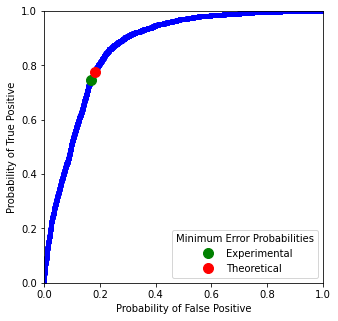

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
# Plot ROC curve
ax.plot(df['False Positive'], df['True Positive'], 'bo', markersize=4)

# Plot experimental minimum
ax.plot(exp_min['False Positive'], exp_min['True Positive'], 'go', label='Experimental', markersize=10)

# Plot theorectical minimum
ax.plot(thy_min['False Positive'], thy_min['True Positive'], 'ro', label='Theoretical', markersize=10)
ax.legend(title='Minimum Error Probabilities')
ax.set_xlabel('Probability of False Positive')
ax.set_ylabel('Probability of True Positive')
ax.set_axisbelow(True)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

3. Using Fischer LDA

7061


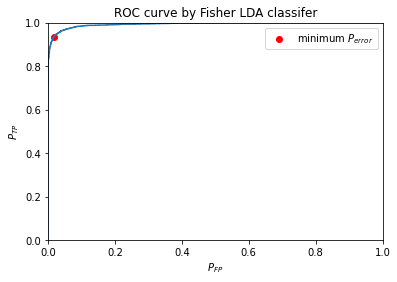

In [ ]:
from scipy import linalg, random
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# set random number generator
random.seed(1234)

eps = 1e-16

class_prior = np.array([.7, .3])
NC = class_prior.size

# class parameter, mean
m = np.array([-1 * np.ones((4, 1)), np.ones((4, 1))])

# class parameter, covariance
C = np.array([[[2, -.5, .3, 0],
               [-.5, 1, -.5, 0],
               [.3, -.5, 1, 0],
               [0, 0, 0, 2]],

              [[1, .3, -.2, 0],
               [.3, 2, .3, 0],
               [-.2, .3, 1, 0],
               [0, 0, 0, 3]]])

# sample size
N = 10000
rnd = random.rand(N)
# assign class
y = rnd >= class_prior[0]

# sampling
X = np.zeros((m.shape[1], N))

class_sample_num = np.zeros(NC).astype(int)

temp = np.insert(np.cumsum(class_prior), 0, 0)

for i in range(NC):
    ind = (rnd >= temp[i]) & (rnd < temp[i + 1])
    class_sample_num[i] = np.sum(ind)
    X[:, ind] = random.multivariate_normal(m[i, :, :].flatten(),
                                           C[i, :, :], class_sample_num[i]).T


# Part C: Fisher LDA classification
# class conditional pdf mean and covariance
muhat0 = np.mean(X[:, ~y], axis=1)
sighat0 = np.cov(X[:, ~y])
muhat1 = np.mean(X[:, y], axis=1)
sighat1 = np.cov(X[:, y])

# between class sctter matrix
Sb = np.dot((muhat0 - muhat1).reshape(-1, 1), (muhat0 - muhat1).reshape(1, -1))

# within class scatter matrix
Sw = sighat0 + sighat1

lam, V = linalg.eig(Sb, Sw)

# projection vector is the eigenvector related to the maximum eigenvalue
wLDA = V[:, np.argmax(lam)]

discriminant_score_LDA = np.dot(wLDA.reshape(1, -1), X)

# choose threshold as the midpoint of every two sorted discriminant score
score_sort = np.sort(discriminant_score_LDA).ravel()
threshold_LDA = (score_sort[0:-1] + score_sort[1:]) / 2
threshold_LDA = np.insert(threshold_LDA, 0, score_sort[0] - eps)
threshold_LDA = np.append(threshold_LDA, score_sort[-1] + eps)

P01_c = np.zeros(threshold_LDA.size)
P10_c = np.zeros(threshold_LDA.size)
P11_c = np.zeros(threshold_LDA.size)
Perr_c = np.zeros(threshold_LDA.size)
for i in range(threshold_LDA.size):
    LDA_decision = discriminant_score_LDA > threshold_LDA[i]
    P01_c[i] = np.sum(~LDA_decision & y) / np.sum(y)
    P10_c[i] = np.sum(LDA_decision & ~y) / np.sum(~y)
    P11_c[i] = np.sum(LDA_decision & y) / np.sum(y)
    Perr_c[i] = P01_c[i] * class_prior[1] + P10_c[i] * class_prior[0]

# plot ROC curve
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(P10_c, P11_c)
ax1.scatter(P10_c[np.argmin(Perr_c)], P11_c[np.argmin(Perr_c)], c='r',
            marker='o', label=r'minimum $P_{error}$')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_xlabel(r'$P_{FP}$')
ax1.set_ylabel(r'$P_{TP}$')
ax1.set_title('ROC curve by Fisher LDA classifer')
ax1.legend()
plt.show()
